# Exploring Pokémon Through Data

by Hayden Baxter

May 11th, 2020

This notebook is intended to be used to explore various aspects about Pokémon from the widely popular video game series under the same name.


### Where did this data come from?

I must give credit where credit is due.

I scraped all of the data that will be imported below from https://pokemonshowdown.com/ . This website is a browser based fan-made game for people to explore the various aspects of Pokémon gameplay, without having to spend the time or money on the actual video game series itself.

While this website is not official, it has a large enough player base that is dedicated to the franchise as to where their database is highly detailed and accurate. I could have pulled this information from an official Pokémon wiki or other web source, but I found that those other websites tended to be muddled with extra ads, useless information, and css styling that was difficult to get around with my web scraping methods.

Speaking of web scraping, I wrote up a script using python and making use of [Selenium](https://www.selenium.dev/) and [Gecko Driver](https://github.com/mozilla/geckodriver/releases). Using these tools, it only took me slightly less than a week to write a script and grab this data.

### What does the data include?

This data includes the following:
* ID: The ID of the pokemon in the National Pokédex
* Name: The official name of the Pokémon
* Subname: Sometimes a Pokémon has more than one form (such as alolan form or a mega evolution). These are represented here as different entities.
* Generation: This is the generation that the Pokémon is considered to be from. This generally corresponds to the game(s) that each pokemon was released with.
* Sprite: On Pokémon Showdown, each Pokémon had a sprite that was used for the game. I have the link to that sprite for possible use later.
* Icon Locations: Each Pokémon, aside from their sprite, also has an 40 by 30 pixel icon. This icon is on a sprite sheet that you can view [here](https://play.pokemonshowdown.com/sprites/pokemonicons-sheet.png?g8)
* Tier: This is a stat that is specific to Pokémon Showdown. They have their own specific set of rules to moderate gameplay on their website, and these tiers are a specification on what pokemon are allowed to be used where.
* Type 1 and 2: Pokémon can have up to two types (minimum of 1). This defines what moves that will be resistant or susceptable to.
* Abilities: A Pokémon can have one ability from a list of up to 4. 1 and 2 can appear naturally in the game, Hidden abilities must be on the pokemon from birth, and the rare special ability each have special circumstances surrounding their usage.
* Egg Groups: These groups determine what Pokémon can breed with eachother.
* HP, ATK, DEF, SPA, SPD, SPE, and BST: These are representations of each Pokémon's base stats.
* Size: While generally not useful for gameplay, it is an interesting stat that specifies the Pokémon's length in meters
* Weight: Rarely useful in gameplay, but again, it is an interesting stat that specifies the Pokémon's weight in kilograms.
* Gender Ratio: This is ration in which Pokémon can be found in the wild.
* Color: The games assign each Pokémon a single color, even though their sprites can be made up of many.
* Link: This is the link to the individal page of each Pokémon.

## Let's Wrangle!

### Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hb33green/Pokemon-Test/master/pokemon.csv')
data.head()

,ID,Name,Subname,Generation,Sprite,Icon Locations,Tier,Type 1,Type 2,Ability 1,...,DEF,SPA,SPD,SPE,BST,Size,Weight,Gender Ratio,Color,Link
0,1,Bulbasaur,None,1,https://play.pokemonshowdown.com/sprites/gen5/...,-40px 0px;,LC,GRASS,POISON,Overgrow,...,49,65,65,45,318,0.7 m,6.9 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/bulbasaur
1,2,Ivysaur,None,1,https://play.pokemonshowdown.com/sprites/gen5/...,-80px 0px;,NFE,GRASS,POISON,Overgrow,...,63,80,80,60,405,1 m,13 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/ivysaur
2,3,Venusaur,None,1,https://play.pokemonshowdown.com/sprites/gen5/...,-120px 0px;,UU,GRASS,POISON,Overgrow,...,83,100,100,80,525,2 m,100 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/venusaur
3,3,Venusaur,Mega,1,https://play.pokemonshowdown.com/sprites/gen5/...,0px -2760px;,Illegal,GRASS,POISON,Thick Fat,...,123,122,120,80,625,2.4 m,155.5 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/venusa...
4,4,Charmander,None,1,https://play.pokemonshowdown.com/sprites/gen5/...,-160px 0px;,LC,FIRE,None,Blaze,...,43,60,50,65,309,0.6 m,8.5 kg,87.5% male 12.5% female,Red,https://dex.pokemonshowdown.com/pokemon/charma...


### Sorting out unwanted Pokémon

While Pokémon Showdown was a great resource for getting this information, it still had lot's of things that I'm not particularly interested in. For instance, they included stats on many Glitch Pokémon that can only be aquired through hacking or glitching the games. For the purposes of most of my explorations, I will be considering them as outliers and remove them from the data.

They also included custom Pokémon that was made by the developers of Pokémon showdown for fun. Since my purpose today is to explore Pokémon, and not Pokémon Showdown, I will also be removing these.

In [3]:
#The bottom of the set before removing unwanted items
data.tail()

,ID,Name,Subname,Generation,Sprite,Icon Locations,Tier,Type 1,Type 2,Ability 1,...,DEF,SPA,SPD,SPE,BST,Size,Weight,Gender Ratio,Color,Link
1196,None,Pokestar Spirit,None,CAP,https://play.pokemonshowdown.com/sprites/gen5/...,0px 0px;,Illegal,DARK,GHOST,Wonder Guard,...,100,100,100,100,600,1.5 m,61 kg,50% male 50% female,White,https://dex.pokemonshowdown.com/pokemon/pokest...
1197,None,Pokestar Black Door,None,CAP,https://play.pokemonshowdown.com/sprites/gen5/...,0px 0px;,Illegal,GRASS,None,Early Bird,...,100,100,100,100,600,1.5 m,61 kg,100% female,White,https://dex.pokemonshowdown.com/pokemon/pokest...
1198,None,Pokestar White Door,None,CAP,https://play.pokemonshowdown.com/sprites/gen5/...,0px 0px;,Illegal,FIRE,None,Blaze,...,100,100,100,100,600,1.5 m,61 kg,100% male,White,https://dex.pokemonshowdown.com/pokemon/pokest...
1199,None,Pokestar Black Belt,None,CAP,https://play.pokemonshowdown.com/sprites/gen5/...,0px 0px;,Illegal,FIGHTING,None,Huge Power,...,100,100,100,100,600,1.5 m,61 kg,100% male,White,https://dex.pokemonshowdown.com/pokemon/pokest...
1200,None,Pokestar UFO,PropU2,CAP,https://play.pokemonshowdown.com/sprites/gen5/...,0px 0px;,Illegal,PSYCHIC,ELECTRIC,Levitate,...,100,100,100,100,600,1.5 m,61 kg,100% genderless,White,https://dex.pokemonshowdown.com/pokemon/pokest...


In [4]:
#The bottom of the set after removing unwanted items
data_clean = data[(data.Generation != "CAP") & (data.Generation != "glitch")]
data_clean.tail()

,ID,Name,Subname,Generation,Sprite,Icon Locations,Tier,Type 1,Type 2,Ability 1,...,DEF,SPA,SPD,SPE,BST,Size,Weight,Gender Ratio,Color,Link
1123,888,Zacian,Crowned,8,https://play.pokemonshowdown.com/sprites/gen5/...,-80px -2730px;,Uber,FAIRY,STEEL,Intrepid Sword,...,115,80,115,148,720,2.8 m,355 kg,100% genderless,Blue,https://dex.pokemonshowdown.com/pokemon/zacian...
1124,889,Zamazenta,None,8,https://play.pokemonshowdown.com/sprites/gen5/...,-40px -2220px;,Uber,FIGHTING,None,Dauntless Shield,...,115,80,115,138,670,2.9 m,210 kg,100% genderless,Red,https://dex.pokemonshowdown.com/pokemon/zamazenta
1125,889,Zamazenta,Crowned,8,https://play.pokemonshowdown.com/sprites/gen5/...,-120px -2730px;,Uber,FIGHTING,STEEL,Dauntless Shield,...,145,80,145,128,720,2.9 m,785 kg,100% genderless,Red,https://dex.pokemonshowdown.com/pokemon/zamaze...
1126,890,Eternatus,None,8,https://play.pokemonshowdown.com/sprites/gen5/...,-80px -2220px;,Uber,POISON,DRAGON,Pressure,...,95,145,95,130,690,20 m,950 kg,100% genderless,Purple,https://dex.pokemonshowdown.com/pokemon/eternatus
1127,890,Eternatus,Eternamax,8,https://play.pokemonshowdown.com/sprites/gen5/...,-160px -2940px;,Illegal,POISON,DRAGON,Pressure,...,250,125,250,130,1125,100 m,0 kg,100% genderless,Purple,https://dex.pokemonshowdown.com/pokemon/eterna...


### Cleaning up errors in the scraping process

Luckily, I was able to catch most of the errors that occured in the scraping process by hand, but I wanted to actually fix them here in order to showcase the cool niche cases of Pokémon.

The first Pokémon is incorrect because of a syntax difference. This is the Pokémon Ho-Oh, who happens to be the only Pokémon with a hyphenated name. All the other Pokémon on Pokémon Showdown used a hyphen to seperate the name of the Pokémon from the name of the specific form. Therefore the scraper mistook 'Oh' for a form of a Pokémon named 'Ho'.

The second Pokémon is the result of the limitations of csv file types. You can look up this Pokémon by its ID number and discover that its name is Flabébé. This is the only Pokémon that utilizes a special character in its name, and the csv didn't know what to do with it.

In [5]:
offender_1 = data_clean[data_clean.Subname == 'Oh']
offender_2 = data_clean[data_clean.Name == 'None']
offender_1.append(offender_2)[['ID','Name','Subname']]

,ID,Name,Subname
323,250,Ho,Oh
827,669,None,None


This is an easy fix.

In [6]:
data_clean.at[323, 'Name'] = 'Ho-Oh'
data_clean.at[323, 'Subname'] = 'None'
data_clean.at[827, 'Name'] = 'Flabébé'
data_clean[data_clean.Name == 'Ho-Oh'].append(data_clean[data_clean.Name == 'Flabébé'])[['ID','Name','Subname']]

,ID,Name,Subname
323,250,Ho-Oh,None
827,669,Flabébé,None


### Making the data manageable

There's lots of different parts and pieces to this data and lots of different things that can be explored. However I don't want to have to be worrying about columns that I won't be using in certain explorations, so I'm going to split everything up into multiple dataframes that contain just the elements that I want to work with.

The first thing I know is that I'm generally uninterested in alternate forms of the Pokémon, so I'll be removing any Pokémon with a Subname bar a few that have seperate entries due to [Sexual Dimorphism](https://en.wikipedia.org/wiki/Sexual_dimorphism).

In [7]:
regular_pokemon = data_clean[(data_clean.Subname == 'None') | (data_clean.Subname == 'F') | (data_clean.Subname == 'M')].drop(['Subname'], axis=1)
regular_pokemon.head()

,ID,Name,Generation,Sprite,Icon Locations,Tier,Type 1,Type 2,Ability 1,Ability 2,...,DEF,SPA,SPD,SPE,BST,Size,Weight,Gender Ratio,Color,Link
0,1,Bulbasaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-40px 0px;,LC,GRASS,POISON,Overgrow,None,...,49,65,65,45,318,0.7 m,6.9 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/bulbasaur
1,2,Ivysaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-80px 0px;,NFE,GRASS,POISON,Overgrow,None,...,63,80,80,60,405,1 m,13 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/ivysaur
2,3,Venusaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-120px 0px;,UU,GRASS,POISON,Overgrow,None,...,83,100,100,80,525,2 m,100 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/venusaur
4,4,Charmander,1,https://play.pokemonshowdown.com/sprites/gen5/...,-160px 0px;,LC,FIRE,None,Blaze,None,...,43,60,50,65,309,0.6 m,8.5 kg,87.5% male 12.5% female,Red,https://dex.pokemonshowdown.com/pokemon/charma...
5,5,Charmeleon,1,https://play.pokemonshowdown.com/sprites/gen5/...,-200px 0px;,NFE,FIRE,None,Blaze,None,...,58,80,65,80,405,1.1 m,19 kg,87.5% male 12.5% female,Red,https://dex.pokemonshowdown.com/pokemon/charme...


I also know that without alternate forms involved, the ID of the Pokémon is going to be unique, so we can use that number for indexing.

In [8]:
regular_pokemon = regular_pokemon.set_index(['ID'])
regular_pokemon.head()

,Name,Generation,Sprite,Icon Locations,Tier,Type 1,Type 2,Ability 1,Ability 2,Hidden Ability,...,DEF,SPA,SPD,SPE,BST,Size,Weight,Gender Ratio,Color,Link
ID,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-40px 0px;,LC,GRASS,POISON,Overgrow,None,Chlorophyll,...,49,65,65,45,318,0.7 m,6.9 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/bulbasaur
2,Ivysaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-80px 0px;,NFE,GRASS,POISON,Overgrow,None,Chlorophyll,...,63,80,80,60,405,1 m,13 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/ivysaur
3,Venusaur,1,https://play.pokemonshowdown.com/sprites/gen5/...,-120px 0px;,UU,GRASS,POISON,Overgrow,None,Chlorophyll,...,83,100,100,80,525,2 m,100 kg,87.5% male 12.5% female,Green,https://dex.pokemonshowdown.com/pokemon/venusaur
4,Charmander,1,https://play.pokemonshowdown.com/sprites/gen5/...,-160px 0px;,LC,FIRE,None,Blaze,None,Solar Power,...,43,60,50,65,309,0.6 m,8.5 kg,87.5% male 12.5% female,Red,https://dex.pokemonshowdown.com/pokemon/charma...
5,Charmeleon,1,https://play.pokemonshowdown.com/sprites/gen5/...,-200px 0px;,NFE,FIRE,None,Blaze,None,Solar Power,...,58,80,65,80,405,1.1 m,19 kg,87.5% male 12.5% female,Red,https://dex.pokemonshowdown.com/pokemon/charme...


### The fun stuff

#### Typing

The first thing I want to do is simplify the dataframe into something more manageable by getting rid of the columns that I don't need for exploring typing.

In [9]:
pokemon_typing = regular_pokemon[['Name','Generation','Type 1', 'Type 2']]
pokemon_typing.head()

,Name,Generation,Type 1,Type 2
ID,,,,
1,Bulbasaur,1,GRASS,POISON
2,Ivysaur,1,GRASS,POISON
3,Venusaur,1,GRASS,POISON
4,Charmander,1,FIRE,None
5,Charmeleon,1,FIRE,None


Secondly, I want to start off with confirming how many different types are possible for a Pokémon. I know that for each type, there is going to be at least one Pokémon that solely has that type. Therefore I can just find all of the unique values in the Type 1 column.

In [10]:
types = np.unique(pokemon_typing['Type 1'].tolist())
types

array(['BUG', 'DARK', 'DRAGON', 'ELECTRIC', 'FAIRY', 'FIGHTING', 'FIRE',
       'FLYING', 'GHOST', 'GRASS', 'GROUND', 'ICE', 'NORMAL', 'POISON',
       'PSYCHIC', 'ROCK', 'STEEL', 'WATER'], dtype='<U8')

Now I'm curious to see how many of each type exists.

In [11]:
typing_in_order = pokemon_typing.rename(columns = {'Type 1' : 'Type_1', 'Type 2' : 'Type_2'}).set_index(['Type_1', 'Type_2']).sort_index()
typing_in_order.head()

for i in types :
    total_num = len(typing_in_order.query('Type_1 == @i')) + len(typing_in_order.query('Type_2 == @i'))
    single_type = len(typing_in_order.query('Type_1 == @i & Type_2 == "None"'))
    dual_type = total_num - single_type
    print(i + ": " + str(single_type) + " Single Type, " + str(dual_type) + " Dual Type, " + str(total_num) + " Total.")

BUG: 19 Single Type, 65 Dual Type, 84 Total.
DARK: 11 Single Type, 42 Dual Type, 53 Total.
DRAGON: 11 Single Type, 41 Dual Type, 52 Total.
ELECTRIC: 31 Single Type, 25 Dual Type, 56 Total.
FAIRY: 19 Single Type, 35 Dual Type, 54 Total.
FIGHTING: 27 Single Type, 30 Dual Type, 57 Total.
FIRE: 33 Single Type, 38 Dual Type, 71 Total.
FLYING: 3 Single Type, 99 Dual Type, 102 Total.
GHOST: 12 Single Type, 38 Dual Type, 50 Total.
GRASS: 43 Single Type, 62 Dual Type, 105 Total.
GROUND: 17 Single Type, 50 Dual Type, 67 Total.
ICE: 13 Single Type, 27 Dual Type, 40 Total.
NORMAL: 68 Single Type, 47 Dual Type, 115 Total.
POISON: 16 Single Type, 53 Dual Type, 69 Total.
PSYCHIC: 38 Single Type, 53 Dual Type, 91 Total.
ROCK: 13 Single Type, 52 Dual Type, 65 Total.
STEEL: 9 Single Type, 45 Dual Type, 54 Total.
WATER: 67 Single Type, 74 Dual Type, 141 Total.


The first thing to take note of is that there are more Water type Pokémon than any other type. They have the most Single Type Pokémon, and the second most Dual Type Pokémon. Let's take a look at how this has changed over the generations.

In [12]:
import matplotlib.pyplot as plt

water_types = typing_in_order.query('Type_1 == "WATER" | Type_2 == "WATER"').set_index(['Generation']).sort_index()
water_types.head()

,Name
Generation,
1,Kingler
1,Gyarados
1,Vaporeon
1,Magikarp
1,Staryu


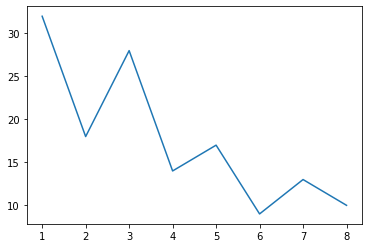

In [13]:
water_type_lengths = []
for i in range(1,9) :
    water_type_lengths.append(len(water_types.loc[str(i)]))

plt.plot(range(1,9),water_type_lengths);

We can see that overall, there is a general trend downwards with each odd numbered generation increasing in the amount of new water types added, and each even numbered generation decreasing in the amount of new water types added.

Let's repeat this process, but for each Type.

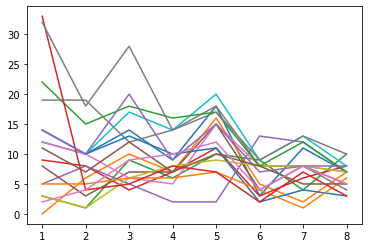

In [14]:
all_lengths = []
for i in types :
    cur_type = typing_in_order.query('Type_1 == @i | Type_2 == @i').set_index(['Generation']).sort_index()
    for j in range(1,9) :
        all_lengths.append(len(cur_type.loc[cur_type.index == str(j)]))
all_lengths = np.asarray(all_lengths).reshape(18, 8)

for i in all_lengths :
    plt.plot(range(1,9), i);

The plot is a bit muddled, but it seems as if all of the typing follows the same general trend with a few rare exceptions. This might be indicative of general trends of the total amount of Pokémon added in each generation, so lets check.

,Name
Generation,
1,151
2,100
3,135
4,106
5,156
6,73
7,85
8,82


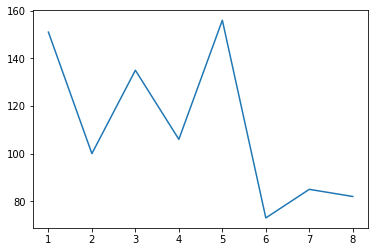

In [15]:
plt.plot(range(1,9), typing_in_order.groupby('Generation').count());
typing_in_order.groupby('Generation').count()

So it does seem to be true that all of the odd numbered generations recieved the most new Pokémon.

#### Dual Types

Taking a slightly different direction, let's look at dual typing. A Pokémon has a minimum of one type, and a maximum of two. First let's figure out how many different type combinations there are.

In [16]:
import math

num_of_types = len(types)
print('The total number of types is ' + str(num_of_types))
print('And we\'re looking at dual types, so two will be taken at a time.')
print('This means that there are ' + str(num_of_types) + ' choose 2 combinations, or:')
dual_type_combinations = math.factorial(num_of_types) / (2 * math.factorial(num_of_types - 2))
print(str(int(dual_type_combinations)) + ' combinations of dual types')

The total number of types is 18
And we're looking at dual types, so two will be taken at a time.
This means that there are 18 choose 2 combinations, or:
153 combinations of dual types


Let's start by making a dataframe where each column and each row corresponds to a type.

In [17]:
counting_frame = np.zeros((num_of_types), dtype=int)
types_dict = {'BUG': counting_frame, 'DARK': counting_frame, 'DRAGON': counting_frame, 'ELECTRIC': counting_frame,
             'FAIRY': counting_frame, 'FIGHTING': counting_frame, 'FIRE': counting_frame, 'FLYING': counting_frame,
             'GHOST': counting_frame, 'GRASS': counting_frame, 'GROUND': counting_frame, 'ICE': counting_frame,
             'NORMAL': counting_frame, 'POISON': counting_frame, 'PSYCHIC': counting_frame, 'ROCK': counting_frame,
             'STEEL': counting_frame, 'WATER': counting_frame}
dual_type_counter = pd.DataFrame(types_dict, index = types)
dual_type_counter

,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
BUG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DRAGON,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ELECTRIC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAIRY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FIGHTING,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FIRE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FLYING,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GHOST,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GRASS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Unlike the explorations with typing, I want to include all of the alternate forms of Pokémon. This is because the developers may have introduced an alternate form of a Pokémon solely to get a dual typing combination that had never been seen before.

In [18]:
pokemon_dual_typing = data_clean[['Name','Subname','Generation','Type 1', 'Type 2']]
dual_typing_in_order = pokemon_dual_typing.rename(columns = {'Type 1' : 'Type_1', 'Type 2' : 'Type_2'}).set_index(['Type_1', 'Type_2']).sort_index()
dual_typing_in_order.head()

Name Subname Generation
Type_1 Type_2                                 
BUG    ELECTRIC      Joltik    None          5
       ELECTRIC  Galvantula    None          5
       ELECTRIC   Charjabug    None          7
       ELECTRIC    Vikavolt    None          7
       ELECTRIC    Vikavolt   Totem          7

Now we can loop through all of the type combinations and add their total count to the corresponding cell in the dataframe.

In [19]:
for i in types :
    for j in types :
        if i == j :
            temp = "None"
        else :
            temp = j
        cur_len = len(dual_typing_in_order.query('Type_1 == @i & Type_2 == @temp'))
        dual_type_counter.loc[i, j] = cur_len
dual_type_counter

,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
BUG,21,0,0,5,3,4,2,17,1,6,2,0,0,12,3,3,11,3
DARK,0,16,4,0,4,2,3,5,2,0,0,2,6,0,2,0,2,0
DRAGON,0,0,14,1,1,3,1,6,3,0,7,3,0,0,4,0,0,0
ELECTRIC,0,2,2,49,2,0,1,6,1,1,0,2,2,5,1,0,5,1
FAIRY,0,0,0,0,23,0,0,2,0,0,0,0,0,0,0,0,1,0
FIGHTING,0,1,0,0,0,31,0,1,1,0,0,1,0,0,3,0,3,0
FIRE,3,1,2,0,0,7,36,8,3,0,3,0,2,0,2,1,1,1
FLYING,0,0,2,0,0,0,0,6,0,0,0,0,0,0,0,0,2,3
GHOST,0,1,2,0,4,0,3,3,18,11,2,0,0,5,0,0,0,0
GRASS,0,3,7,0,5,3,0,7,1,47,1,3,0,15,2,0,3,0


Already there is an issue with the dataframe above. In Pokémon the order of the typing does not matter. This means that a Pokémon that is Dragon, Electric will have the exact same benefits and downfalls from typing as a Pokémon who is Electric, Dragon. We can fix this pretty easily with a couple of steps.

First let's take the transpose.

In [20]:
dual_type_counter_transpose = dual_type_counter.transpose()
dual_type_counter_transpose

,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
BUG,21,0,0,0,0,0,3,0,0,0,0,2,0,1,0,2,0,3
DARK,0,16,0,2,0,1,1,0,1,3,3,0,0,5,1,2,0,7
DRAGON,0,4,14,2,0,0,2,2,2,7,2,0,1,4,1,2,3,3
ELECTRIC,5,0,1,49,0,0,0,0,0,0,1,0,0,0,0,3,0,2
FAIRY,3,4,1,2,23,0,0,0,4,5,0,1,5,1,10,3,5,4
FIGHTING,4,2,3,0,0,31,7,0,0,3,0,0,4,2,3,1,1,3
FIRE,2,3,1,1,0,0,36,0,3,0,1,1,0,3,1,3,0,0
FLYING,17,5,6,6,2,1,8,6,3,7,4,2,27,3,7,6,2,7
GHOST,1,2,3,1,0,1,3,0,18,1,4,1,0,0,3,0,4,2
GRASS,6,0,0,1,0,0,0,0,11,47,0,0,2,0,1,2,0,3


Then let's add the two together.

In [21]:
dual_type_counter_doubled = dual_type_counter_transpose + dual_type_counter
dual_type_counter_doubled

,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
BUG,42,0,0,5,3,4,5,17,1,6,2,2,0,13,3,5,11,6
DARK,0,32,4,2,4,3,4,5,3,3,3,2,6,5,3,2,2,7
DRAGON,0,4,28,3,1,3,3,8,5,7,9,3,1,4,5,2,3,3
ELECTRIC,5,2,3,98,2,0,1,6,1,1,1,2,2,5,1,3,5,3
FAIRY,3,4,1,2,46,0,0,2,4,5,0,1,5,1,10,3,6,4
FIGHTING,4,3,3,0,0,62,7,1,1,3,0,1,4,2,6,1,4,3
FIRE,5,4,3,1,0,7,72,8,6,0,4,1,2,3,3,4,1,1
FLYING,17,5,8,6,2,1,8,12,3,7,4,2,27,3,7,6,4,10
GHOST,1,3,5,1,4,1,6,3,36,12,6,1,0,5,3,0,4,2
GRASS,6,3,7,1,5,3,0,7,12,94,1,3,2,15,3,2,3,3


Now we've basically doubled our count for everything, so lets divide the diagonals by two.

In [22]:
for i in types :
    dual_type_counter_doubled.loc[i, i] = dual_type_counter_doubled.loc[i, i] / 2
dual_type_counter_doubled

,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
BUG,21.0,0.0,0.0,5.0,3.0,4.0,5.0,17.0,1.0,6.0,2.0,2.0,0.0,13.0,3.0,5.0,11.0,6.0
DARK,0.0,16.0,4.0,2.0,4.0,3.0,4.0,5.0,3.0,3.0,3.0,2.0,6.0,5.0,3.0,2.0,2.0,7.0
DRAGON,0.0,4.0,14.0,3.0,1.0,3.0,3.0,8.0,5.0,7.0,9.0,3.0,1.0,4.0,5.0,2.0,3.0,3.0
ELECTRIC,5.0,2.0,3.0,49.0,2.0,0.0,1.0,6.0,1.0,1.0,1.0,2.0,2.0,5.0,1.0,3.0,5.0,3.0
FAIRY,3.0,4.0,1.0,2.0,23.0,0.0,0.0,2.0,4.0,5.0,0.0,1.0,5.0,1.0,10.0,3.0,6.0,4.0
FIGHTING,4.0,3.0,3.0,0.0,0.0,31.0,7.0,1.0,1.0,3.0,0.0,1.0,4.0,2.0,6.0,1.0,4.0,3.0
FIRE,5.0,4.0,3.0,1.0,0.0,7.0,36.0,8.0,6.0,0.0,4.0,1.0,2.0,3.0,3.0,4.0,1.0,1.0
FLYING,17.0,5.0,8.0,6.0,2.0,1.0,8.0,6.0,3.0,7.0,4.0,2.0,27.0,3.0,7.0,6.0,4.0,10.0
GHOST,1.0,3.0,5.0,1.0,4.0,1.0,6.0,3.0,18.0,12.0,6.0,1.0,0.0,5.0,3.0,0.0,4.0,2.0
GRASS,6.0,3.0,7.0,1.0,5.0,3.0,0.0,7.0,12.0,47.0,1.0,3.0,2.0,15.0,3.0,2.0,3.0,3.0


And to get rid of the doubled dual typing counts, we can just ignore the upper triangular section of the dataframe.

In [23]:
lower_tri_matrix = np.tril(np.ones(dual_type_counter_doubled.shape)).astype(np.bool)
dual_type_counter_merged = dual_type_counter_doubled.where(lower_tri_matrix)
dual_type_counter_merged

,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
BUG,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DARK,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRAGON,0.0,4.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ELECTRIC,5.0,2.0,3.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAIRY,3.0,4.0,1.0,2.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIGHTING,4.0,3.0,3.0,0.0,0.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIRE,5.0,4.0,3.0,1.0,0.0,7.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLYING,17.0,5.0,8.0,6.0,2.0,1.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHOST,1.0,3.0,5.0,1.0,4.0,1.0,6.0,3.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRASS,6.0,3.0,7.0,1.0,5.0,3.0,0.0,7.0,12.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have a workable dataframe, we can start looking at it. Firstly, let's check and see what the maximum values are.

In [24]:
dual_type_counter_merged.idxmax()

BUG              BUG
DARK            DARK
DRAGON        DRAGON
ELECTRIC    ELECTRIC
FAIRY          FAIRY
FIGHTING    FIGHTING
FIRE            FIRE
FLYING        NORMAL
GHOST          GHOST
GRASS          GRASS
GROUND        GROUND
ICE              ICE
NORMAL        NORMAL
POISON        POISON
PSYCHIC      PSYCHIC
ROCK            ROCK
STEEL          STEEL
WATER          WATER
dtype: object

So apparently the diagonal of the matrix is where all of the greatest values are. This makes sense because this tells us that there are more single type Pokémon than any dual type combinations. In order to avoid this, lets temporarily remove the diagonal.

In [25]:
dual_type_counter_merged_no_diag = dual_type_counter_merged.copy()
for i in types :
    dual_type_counter_merged_no_diag.loc[i, i] = np.nan
dual_type_counter_merged_no_diag

,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
BUG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DARK,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRAGON,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ELECTRIC,5.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAIRY,3.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIGHTING,4.0,3.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIRE,5.0,4.0,3.0,1.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLYING,17.0,5.0,8.0,6.0,2.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHOST,1.0,3.0,5.0,1.0,4.0,1.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRASS,6.0,3.0,7.0,1.0,5.0,3.0,0.0,7.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And we can try the same thing again and see if we get more interesting results.

In [26]:
dual_type_counter_merged_no_diag.idxmax()

BUG          FLYING
DARK          WATER
DRAGON       GROUND
ELECTRIC     FLYING
FAIRY       PSYCHIC
FIGHTING       FIRE
FIRE         FLYING
FLYING       NORMAL
GHOST         GRASS
GRASS        POISON
GROUND        WATER
ICE           WATER
NORMAL      PSYCHIC
POISON        WATER
PSYCHIC       STEEL
ROCK          WATER
STEEL         WATER
WATER           NaN
dtype: object

This is definitely more interesting. The first thing that I notice is that Water seems to be the most common pairing for dual types. This falls in line with an earlier discovery that water type Pokémon are the most common.

Next, I want to get a list of unused dual types.

In [27]:
dual_type_counter_merged_no_diag.where(dual_type_counter_merged_no_diag == 0)

,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
BUG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DARK,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRAGON,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ELECTRIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAIRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIGHTING,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIRE,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLYING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHOST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRASS,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Just using our eyes, we can see that the unused typings are as follows:

- Dark, Bug
- Dragon, Bug
- Fighting, Electric
- Fighting, Fairy
- Fire, Fairy
- Grass, Fire
- Ground, Fairy
- Ground, Fighting
- Normal, Bug
- Normal, Ghost
- Normal, Ice
- Poison, Ice
- Poison, Normal
- Psychic, Poison
- Rock, Ghost
- Rock, Normal
- Steel, Normal
- Steel, Poison

#### Stats by Type

Now that we've taken a look at the basics of typing, I want to move on to some of its biases. The first thing that I want to look at is power. We can take a similar approach as before, but looking at averages for a Pokémon's base statistics.

In [28]:
stats_by_type = pd.DataFrame(types_dict, index = types)
stats_by_type

,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
BUG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DARK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DRAGON,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ELECTRIC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FAIRY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FIGHTING,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FIRE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FLYING,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GHOST,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GRASS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We also need a new dataframe that includes a Pokémon's base stats.

In [29]:
pokemon_typing_stats = data_clean[['Name','Subname','Generation','Type 1', 'Type 2', 'HP', 'ATK', 'DEF', 'SPA', 'SPD', 'SPE', 'BST']]
pokemon_typing_stats_in_order = pokemon_typing_stats.rename(columns = {'Type 1' : 'Type_1', 'Type 2' : 'Type_2'}).set_index(['Type_1', 'Type_2']).sort_index()
pokemon_typing_stats_in_order.head()

Name Subname Generation  HP  ATK  DEF  SPA  SPD  SPE  \
Type_1 Type_2                                                                 
BUG    ELECTRIC      Joltik    None          5  50   47   50   57   50   65   
       ELECTRIC  Galvantula    None          5  70   77   60   97   60  108   
       ELECTRIC   Charjabug    None          7  57   82   95   55   75   36   
       ELECTRIC    Vikavolt    None          7  77   70   90  145   75   43   
       ELECTRIC    Vikavolt   Totem          7  77   70   90  145   75   43   

                 BST  
Type_1 Type_2         
BUG    ELECTRIC  319  
       ELECTRIC  472  
       ELECTRIC  400  
       ELECTRIC  500  
       ELECTRIC  500

Before we start making our charts for each stat, I know that I will be repeating the same merging process to move everything into the lower triangular section of the chart. Therefore we can write up a quick function in order to save time.

In [30]:
lower_tri_matrix = np.tril(np.ones(dual_type_counter_doubled.shape)).astype(np.bool)

def merge_to_lower_triangular(X) :
    X_transpose = X.transpose()
    X_doubled = X_transpose + X
    for i in types :
        X_doubled.loc[i, i] = X_doubled.loc[i, i] / 2
    X_merged = X_doubled.where(lower_tri_matrix)
    return X_merged

Let's start with BST. We'll make a chart with the total BST, merge them, and then divide using the chart we made for the Dual Typing explorations.

In [31]:
bst_by_type = stats_by_type.copy()

for i in types :
    for j in types :
        if i == j :
            temp = "None"
        else :
            temp = j
        cur_tot = pokemon_typing_stats_in_order.query('Type_1 == @i & Type_2 == @temp')['BST'].sum()
        bst_by_type.loc[i, j] = cur_tot
        
bst_by_type = merge_to_lower_triangular(bst_by_type)
bst_by_type = bst_by_type / dual_type_counter_merged
bst_by_type

,BUG,DARK,DRAGON,ELECTRIC,FAIRY,FIGHTING,FIRE,FLYING,GHOST,GRASS,GROUND,ICE,NORMAL,POISON,PSYCHIC,ROCK,STEEL,WATER
BUG,321.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DARK,NaN,442.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRAGON,NaN,472.500000,438.357143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ELECTRIC,438.200000,436.000000,598.333333,400.530612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAIRY,410.666667,413.750000,590.000000,500.500000,449.130435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIGHTING,560.000000,443.666667,540.000000,NaN,NaN,430.193548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FIRE,453.000000,490.000000,599.666667,520.000000,NaN,492.857143,423.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLYING,419.411765,494.000000,578.750000,527.333333,475.000000,500.000000,539.875000,510.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHOST,236.000000,448.333333,528.000000,440.000000,476.000000,600.000000,430.833333,440.666667,452.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRASS,384.000000,431.666667,480.000000,520.000000,404.000000,523.333333,NaN,407.142857,428.833333,409.531915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
print(bst_by_type[bst_by_type.max().idxmax()].idxmax() + " " + bst_by_type.max().idxmax())

POISON DRAGON


So as it turns out, the Poison Dragon combo has the highest average base stat total. Lets see if it stays at the top for the 6 other stats.

In [33]:
hp_by_type = stats_by_type.copy()
atk_by_type = stats_by_type.copy()
def_by_type = stats_by_type.copy()
spa_by_type = stats_by_type.copy()
spd_by_type = stats_by_type.copy()
spe_by_type = stats_by_type.copy()

for i in types :
    for j in types :
        if i == j :
            temp = "None"
        else :
            temp = j
        bst_tot = pokemon_typing_stats_in_order.query('Type_1 == @i & Type_2 == @temp')['BST'].sum()
        bst_by_type.loc[i, j] = bst_tot
        hp_tot = pokemon_typing_stats_in_order.query('Type_1 == @i & Type_2 == @temp')['HP'].sum()
        hp_by_type.loc[i, j] = hp_tot
        atk_tot = pokemon_typing_stats_in_order.query('Type_1 == @i & Type_2 == @temp')['ATK'].sum()
        atk_by_type.loc[i, j] = atk_tot
        def_tot = pokemon_typing_stats_in_order.query('Type_1 == @i & Type_2 == @temp')['DEF'].sum()
        def_by_type.loc[i, j] = def_tot
        spa_tot = pokemon_typing_stats_in_order.query('Type_1 == @i & Type_2 == @temp')['SPA'].sum()
        spa_by_type.loc[i, j] = spa_tot
        spd_tot = pokemon_typing_stats_in_order.query('Type_1 == @i & Type_2 == @temp')['SPD'].sum()
        spd_by_type.loc[i, j] = spd_tot
        spe_tot = pokemon_typing_stats_in_order.query('Type_1 == @i & Type_2 == @temp')['SPE'].sum()
        spe_by_type.loc[i, j] = spe_tot

bst_by_type = merge_to_lower_triangular(bst_by_type)
bst_by_type = bst_by_type / dual_type_counter_merged
print("Best average typing for BST: " + bst_by_type[bst_by_type.max().idxmax()].idxmax() + " " + bst_by_type.max().idxmax())
hp_by_type = merge_to_lower_triangular(hp_by_type)
hp_by_type = hp_by_type / dual_type_counter_merged
print("Best average typing for HP: " + hp_by_type[hp_by_type.max().idxmax()].idxmax() + " " + hp_by_type.max().idxmax())
atk_by_type = merge_to_lower_triangular(atk_by_type)
atk_by_type = atk_by_type / dual_type_counter_merged
print("Best average typing for ATK: " + atk_by_type[atk_by_type.max().idxmax()].idxmax() + " " + atk_by_type.max().idxmax())
def_by_type = merge_to_lower_triangular(def_by_type)
def_by_type = def_by_type / dual_type_counter_merged
print("Best average typing for DEF: " + def_by_type[def_by_type.max().idxmax()].idxmax() + " " + def_by_type.max().idxmax())
spa_by_type = merge_to_lower_triangular(spa_by_type)
spa_by_type = spa_by_type / dual_type_counter_merged
print("Best average typing for SPA: " + spa_by_type[spa_by_type.max().idxmax()].idxmax() + " " + spa_by_type.max().idxmax())
spd_by_type = merge_to_lower_triangular(spd_by_type)
spd_by_type = spd_by_type / dual_type_counter_merged
print("Best average typing for SPD: " + spd_by_type[spd_by_type.max().idxmax()].idxmax() + " " + spd_by_type.max().idxmax())
spe_by_type = merge_to_lower_triangular(spe_by_type)
spe_by_type = spe_by_type / dual_type_counter_merged
print("Best average typing for SPE: " + spe_by_type[spe_by_type.max().idxmax()].idxmax() + " " + spe_by_type.max().idxmax())

print()
bst_by_type = merge_to_lower_triangular(bst_by_type)
bst_by_type = bst_by_type / dual_type_counter_merged
print("Worst average typing for BST: " + bst_by_type[bst_by_type.min().idxmin()].idxmin() + " " + bst_by_type.min().idxmin())
hp_by_type = merge_to_lower_triangular(hp_by_type)
hp_by_type = hp_by_type / dual_type_counter_merged
print("Worst average typing for HP: " + hp_by_type[hp_by_type.min().idxmin()].idxmin() + " " + hp_by_type.min().idxmin())
atk_by_type = merge_to_lower_triangular(atk_by_type)
atk_by_type = atk_by_type / dual_type_counter_merged
print("Worst average typing for ATK: " + atk_by_type[atk_by_type.min().idxmin()].idxmin() + " " + atk_by_type.min().idxmin())
def_by_type = merge_to_lower_triangular(def_by_type)
def_by_type = def_by_type / dual_type_counter_merged
print("Worst average typing for DEF: " + def_by_type[def_by_type.min().idxmin()].idxmin() + " " + def_by_type.min().idxmin())
spa_by_type = merge_to_lower_triangular(spa_by_type)
spa_by_type = spa_by_type / dual_type_counter_merged
print("Worst average typing for SPA: " + spa_by_type[spa_by_type.min().idxmin()].idxmin() + " " + spa_by_type.min().idxmin())
spd_by_type = merge_to_lower_triangular(spd_by_type)
spd_by_type = spd_by_type / dual_type_counter_merged
print("Worst average typing for SPD: " + spd_by_type[spd_by_type.min().idxmin()].idxmin() + " " + spd_by_type.min().idxmin())
spe_by_type = merge_to_lower_triangular(spe_by_type)
spe_by_type = spe_by_type / dual_type_counter_merged
print("Worst average typing for SPE: " + spe_by_type[spe_by_type.min().idxmin()].idxmin() + " " + spe_by_type.min().idxmin())

Best average typing for BST: POISON DRAGON
Best average typing for HP: POISON DRAGON
Best average typing for ATK: ICE FIRE
Best average typing for DEF: STEEL ROCK
Best average typing for SPA: PSYCHIC GHOST
Best average typing for SPD: ROCK FAIRY
Best average typing for SPE: ICE FIRE

Worst average typing for BST: NORMAL NORMAL
Worst average typing for HP: WATER WATER
Worst average typing for ATK: WATER WATER
Worst average typing for DEF: NORMAL NORMAL
Worst average typing for SPA: NORMAL NORMAL
Worst average typing for SPD: WATER WATER
Worst average typing for SPE: NORMAL NORMAL


Interestingly enough, the best overall typing combination only rules the HP stat. The rest are taken up by other combinations. Most are fairly surprising except for ICE, FIRE taking the top spot for speed. Let's investigate.

In [34]:
pokemon_typing_stats_in_order.loc[('ICE', 'FIRE')]
#The following line will produce an error because there is no Pokémon that is a Fire, Ice type with Fire listed first.
#pokemon_typing_stats_in_order.loc[('FIRE', 'ICE')]

,,Name,Subname,Generation,HP,ATK,DEF,SPA,SPD,SPE,BST
Type_1,Type_2,,,,,,,,,,
ICE,FIRE,Darmanitan,Galar-Zen,5,105,160,55,30,55,135,540


As we can see, there is only a single Pokémon with that type combination. And upon further investigation into it's [wiki page](https://www.serebii.net/pokedex-swsh/darmanitan/#), we can see that this specific form of the Pokémon is found in a single region, and has this specific form activated only upon losing 50% or more of its health. In other words, this Pokémon typing combination would be very rare to see in normal gameplay.

This is a very good example of why the alternate forms of Pokémon were included. It is likely that this typing match-up was seen to be special by the developers in some form or fashion, so they made it something rare and by extension more special.

Let's explore the other type combinations that took top spots.

In [35]:
pokemon_typing_stats_in_order.loc[('POISON', 'DRAGON')]
#The following line will produce an error because there is no Pokémon that is a Poison, Dragon type with Dragon listed first.
#pokemon_typing_stats_in_order.loc[('DRAGON', 'POISON')]

Name    Subname Generation   HP  ATK  DEF  SPA  SPD  SPE  \
Type_1 Type_2                                                                  
POISON DRAGON   Dragalge       None          6   65   75   90   97  123   44   
       DRAGON  Naganadel       None          7   73   73   73  127   73  121   
       DRAGON  Eternatus       None          8  140   85   95  145   95  130   
       DRAGON  Eternatus  Eternamax          8  255  115  250  125  250  130   

                BST  
Type_1 Type_2        
POISON DRAGON   494  
       DRAGON   540  
       DRAGON   690  
       DRAGON  1125

In [36]:
display(pokemon_typing_stats_in_order.loc[('STEEL', 'ROCK')], pokemon_typing_stats_in_order.loc[('ROCK', 'STEEL')])

Name Subname Generation  HP  ATK  DEF  SPA  SPD  SPE  BST
Type_1 Type_2                                                             
STEEL  ROCK      Aron    None          3  50   70  100   40   40   30  330
       ROCK    Lairon    None          3  60   90  140   50   50   40  430
       ROCK    Aggron    None          3  70  110  180   60   60   50  530

Name Subname Generation  HP  ATK  DEF  SPA  SPD  SPE  BST
Type_1 Type_2                                                                
ROCK   STEEL    Shieldon    None          4  30   42  118   42   88   30  350
       STEEL   Bastiodon    None          4  60   52  168   47  138   30  495
       STEEL   Probopass    None          4  60   55  145   75  150   40  525
       STEEL   Stakataka    None          7  61  131  211   53  101   13  570

In [37]:
pokemon_typing_stats_in_order.loc[('PSYCHIC', 'GHOST')]
#The following line will produce an error because there is no Pokémon that is a Psychic, Ghost type with Ghost listed first. 
#pokemon_typing_stats_in_order.loc[('GHOST', 'PSYCHIC')]

Name     Subname Generation   HP  ATK  DEF  SPA  SPD  SPE  \
Type_1  Type_2                                                                  
PSYCHIC GHOST      Hoopa        None          6   80  110   60  150  130   70   
        GHOST     Lunala        None          7  137  113   89  137  107   97   
        GHOST   Necrozma  Dawn-Wings          7   97  113  109  157  127   77   

                BST  
Type_1  Type_2       
PSYCHIC GHOST   600  
        GHOST   680  
        GHOST   680

In [38]:
pokemon_typing_stats_in_order.loc[('ROCK', 'FAIRY')]
#The following line will produce an error because there is no Pokémon that is a Rock, Fairy type with Fairy listed first.
#pokemon_typing_stats_in_order.loc[('FAIRY', 'ROCK')]

Name Subname Generation  HP  ATK  DEF  SPA  SPD  SPE  BST
Type_1 Type_2                                                              
ROCK   FAIRY   Carbink    None          6  50   50  150   50  150   50  500
       FAIRY   Diancie    None          6  50  100  150  100  150   50  600
       FAIRY   Diancie    Mega          6  50  160  110  160  110  110  700

To talk about the worst type combinations from above, it seems that all of them are either monotype normal, or monotype water. Recall that these were the two most common types to appear during our explorations above (although we only tested Pokémon without subnames, it can probably be inferred that even the subtypes are going to be relatively high in count).

Given this, and the fact that all of the best type combinations on average are lacking in sample size, it seems as if there is a bias present based off of the rarity of a Pokémon. This may either be due to the process in which this information was gathered, or due to the developers wanting to make something special.

### Conclusions

A lot have numbers have been thrown around. I want to take a minute to go over what was discovered, and offer some possible reasoning for them.

#### Typing

In this section, it was discovered that Water, and Normal type Pokémon are the most common. We also discovered that there is a pattern for each generation, with the odd numbered getting an increase in Pokémon, and the even numbered getting a decrease. For Water and Normal being the most common, this is likely because of the formulaic manner in which most Pokémon games are built. Usually, Normal and Water type Pokémon are available the earliest in the game, and persist throughout. This would mean that they are just more common. As for the generational differences in new Pokémon, it is possible that this can be attributed to hardware differences. Generation 4 was the first set of main series Pokémon games to be on the NDS, Generation 6 was the first on the 3DS, and Generation 8 for the Nintendo Switch. Perhaps on second titles for a console, the development team is more experienced and can produce more content before their deadlines.

#### Dual Typing

In this section, we explored the rarity of certain typing combinations. We also learned how to deal with the unorganized typing system, where certain types may be listed before others. Not much can be drawn from this section, but it was useful for the final set of explorations into typing biases with base stats.

#### Stats by Type

In this section, we figured out that on average, the most powerful typing combinations were with non-common types. We also learned that the least powerful typing combinations were with the most common types. The lower powered Pokémon being all Water or Normal type is likely the same reason as why they're so common. As mentioned in the Typing conclusion, these are usually the types of Pokémon present early on in the main series games. By extension, this also means that they're usually less powerful. On the other side of things, many of the more powerful typing combinations were likely purposefully designed that way. If the developers go out of their way to make a type combination rare, it is likely that they'll want to reward players who seek such such rarity with higher level Pokémon. This is very much in-line with common business strategies that the Pokémon Company employs to sell their products. [Special events](https://bulbapedia.bulbagarden.net/wiki/List_of_event_Pok%C3%A9mon_distributions) and [Pokémon exclusivity](https://bulbapedia.bulbagarden.net/wiki/Game-exclusive_Pok%C3%A9mon) are just a couple of the tactics that the company is famous for using to sell more product. It would be no surprise if similar tactics were used to drive the game design and add replayability to the main series titles.

#### The things I didn't get to
There were a few other things that I wanted to dive into, but will have to save for a later day. I mostly wanted to explore the same general areas, but compare things to color and gender ratio instead. I decided that this project already had quite a bit of material, and many different strategies that were used to extrapolate data.

#### Final thoughts
I hate to end a report with the clichéd 'I learned so much', but I truly did. I would have to say that the biggest learning curve was the web scraping process, but I believe that it will have the most payoff. My father is a Global Solutions Architect for [AWS](https://aws.amazon.com/), and after seeing the work that I had done scraping the large amounts of Pokémon data he recruited me to help him with some of his personal projects that require similar tactics. Overall I was glad that I took the time to pick out some data that I was truly interested in, and I always had a great time discussing and sharing my findings with friends and family as I made them.